# Mapping the Reads to the Human Genome

#### INPUT to terminal: 
bowtie2 -p 4 --very-fast --no-unal -x /data/hg19/hg19 -U /data/lab6/illumina_reads.fastq -S output_natina.sam --un unaligned_nate.fastq

#### OUTPUT from terminal:
- 1124714 reads; of these:
  - 1124714 (100.00%) were unpaired; of these:
    - 1028379 (91.43%) aligned 0 times
    - 87274 (7.76%) aligned exactly 1 time
    - 9061 (0.81%) aligned >1 times"""
- 8.57% overall alignment rate

#### DESCRIPTION: This code took in the reads from Illumina stored at "/data/lab6/illumina_reads.fastq" and attempted to align them to the bowtie2 database containing the human genome, "/data/hg/hg." It outputs the aligned reads into a .sam file named "output_natina.sam" and the unaligned reads to a seperate .fastq file titled "unaligned_nate.fastq". A description of the codewords used follows: "-p 4" tells bowtie to use 4 threads/cores instead of one (4x faster); "--very-fast" tells bowtie to prioritize speed over sensitivity; "--no-unal" tells bowtie not to report the unaligned reads in the output SAM file; "-x" specifies the path of the database that you are trying to align to, in this case, "/data/hg19/hg19"; "-U" specifies the path to your input reads in FASTQ format, in this case "/data/lab6/illumina_reads.fastq"; "-S" specifies the path to the output SAM file, in this case "output_natina.sam" ; "-un" tells bowtie where to dump the unaligned reads, in this case "unaligned_nate.fastq".


# Mapping the Remaining Reads to the Reference Genome

#### INPUT to terminal
bowtie2 -p 4 --very-fast --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 -U unaligned_nate.fastq  -S aligned_to_shewa.sam --un unaligned_to_shewa.fastq

#### OUTPUT from terminal
- 1028379 reads; of these:
 -  1028379 (100.00%) were unpaired; of these:
   -  299560 (29.13%) aligned 0 times
   -  687571 (66.86%) aligned exactly 1 time
    - 41248 (4.01%) aligned >1 times
- 70.87% overall alignment rate

#### DESCRIPTION: This code follows the same format of the code described at length immediately above this. This time, the database that "-x" is specifying is "/data/lab6/shewanella_oneidensis_mr-1", the reference genome (not the human genome). The reads that it is attempting to align to the specified genome are the unaligned reads from the previous line of code. These imput reads are stored in the FASTQ file named "unaligned_nate.fastq". This time the aligned reads are output to the SAM file named "aligned_to_shewa.sam" and the unaligned reads are output to the FASTQ file "unaligned_to_shewa.fastq".

# Mapping the Remaining Reads Using Very Sensitive

##### INPUT to terminal:
bowtie2 -p 4 --very-sensitive --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 -U unaligned_nate.fastq  -S aligned_to_shewa_sensitive.sam --un unaligned_to_shewa_sensitive.fastq

##### OUTPUT from terminal:
- 1028379 reads; of these:
  - 1028379 (100.00%) were unpaired; of these:
   -  298112 (28.99%) aligned 0 times
   -  688180 (66.92%) aligned exactly 1 time
    - 42087 (4.09%) aligned >1 times
- 71.01% overall alignment rate

#### DESCRIPTION: This line in terminal has the same the same inputs as the line immediately above. The output files differ becasue they are titled differently to allow me to distinguish from the previous output files. This time the aligned reads were put into SAM file named "aligned_to_shewa_sensitive.sam" and the unaligned reads were put into a FASTQ file named :unaligned_to_shewa_sensitive.fastq". The difference between this and the previous line in terminal is that the code word "--very-sensitive" replaced "--very-fast". This tells bowtie to prioritize sensitivity over speed. This sensitive run has a 71.01% alignement rate compared to the 70.87% alignment rate for the fast run. 

# Converting to BAM, Sorting, Indexing, and Using "depth"

####  INPUT to terminal

- samtools view -b aligned_to_shewa_sensitive.sam > aligned_to_shewa.bam
- samtools sort aligned_to_shewa.bam > aligned_to_shewa.sorted.bam
- samtools index aligned_to_shewa.sorted.bam
- samtools depth -a aligned_to_shewa.sorted.bam > pileup_nate.tab

#### The first line converted "aligned_to_shewa_sensitive.sam" from SAM to BAM and named it "aligned_to_shewa.bam". The following line sorted the BAM file, "aligned_to_shewa.bam", by coordinates so that we would be able to index it, and output a BAM file, "aligned_to_shewa.sorted.bam". 


In [24]:
import csv 
with open("pileup_nate.tab") as inp:
    a = list(zip(*(line.strip().split('\t') for line in inp)))

In [25]:
positions = []
for x in a[1]:
    positions.append(int(x))

depth_cov = []
for x in a[2]:
    depth_cov.append(int(x))
    

print("max coverage:")
print(max(depth_cov))
print("min coverage")
print(min(depth_cov))
print("mean coverage")
print(sum(depth_cov)/len(depth_cov))


max coverage:
281
min coverage
0
mean coverage
37.03830306625343


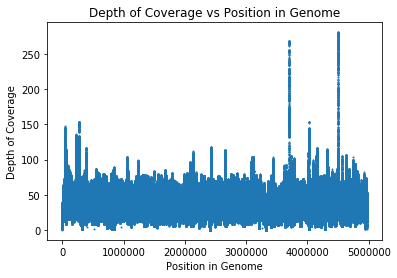

In [26]:
import matplotlib.pyplot as plt
import numpy as np

x_values = positions
y_values= depth_cov
plt.scatter(x_values, y_values, s = 1)
plt.xlabel("Position in Genome")
plt.ylabel("Depth of Coverage")
plt.title("Depth of Coverage vs Position in Genome")
plt.show()

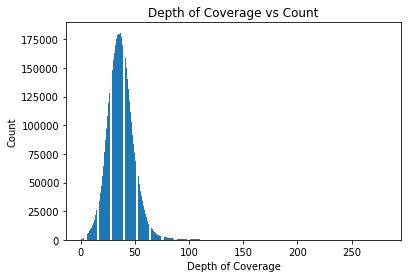

In [27]:
depth_axis = range(1, max(depth_cov) + 1)


def count(num, lst):
    i,c = 0, 0
    while i < len(lst):
        if lst[i] == num:
            c += 1
        i += 1
    return c
count_axis = []        
for x in depth_axis:
    count_axis.append(count(x, depth_cov))

plt.bar(depth_axis, count_axis)
plt.xlabel("Depth of Coverage")
plt.ylabel("Count")
plt.title("Depth of Coverage vs Count")
plt.show()

- samtools view -b output_natina.sam > output_natina.bam
- samtools sort output_natina.bam > output_natina.sorted.bam
- samtools index output_natina.sorted.bam
- samtools depth -a output_natina.sorted.bam > pileup_hg.tab

In [ ]:
import csv 
with open("pileup_hg.tab") as inp:
    b = list(zip(*(line.strip().split('\t') for line in inp)))

In [ ]:
chromosomes = []
for x in b[0]:
    chromosomes.append(x)
hpositions = []
for x in b[1]:
    hpositions.append(int(x))

hdepth_cov = []
for x in a[2]:
    hdepth_cov.append(int(x))